<div dir=rtl align=center>

<img src='https://upload.wikimedia.org/wikipedia/fa/thumb/a/a9/Sharif_logo.svg/626px-Sharif_logo.svg.png?20110526112825' alt="SUT logo" width=200 height=200 align=center  >
<br>
<font face="B Yekan">
<font color=0F5298 size=7>
یادگیری ماشین<br>
<font color=2565AE size=5>
دانشکده مهندسی صنایع<br>
<font color=2565AE size=4>
دکتر مهدی شریف زاده <br>
<font  size=4>

سعید زواشکیانی
 <br>
بهار 1402<br>

<font color=3C99D size=5>
تمرین عملی 1
<br>
سوال 4
مصالحه بایاس-واریانس 
<br>
80 نمره
    
    
____


### Full Name : 

### Student Number : 

---


<div dir="rtl" style="font-size:16px;">
<font face="B Yekan">
در این تمرین با مصالحه بایاس-واریانس (bias-variance tradeoff) آشنا خواهید شد.

</div>

# Libraries

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['cyan','orange'])
cmap_bold = ListedColormap(['red', 'blue'])
import numpy as np
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from matplotlib.ticker import ScalarFormatter
# add what you want

# A. Make data (5 points)

<div dir="rtl" style="font-size:16px;"><font face="B Yekan">

ابتدا یک دیتاست مصنوعی با استفاده از 
[دستور make_moons](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html)
 با پارامتر noise=0.35 و با ۱۵۰۰ داده تصادفی بسازید.
</div>

In [14]:
data = make_moons(n_samples=1500, noise=0.35)


# B. Scatter Plot (5 points)

<div dir="rtl" style="font-size:16px;">
<font face="B Yekan">

نمودار پراکندگی هر کلاس را با رنگ متفاوت در یک نمودار رسم کنید.
</div>

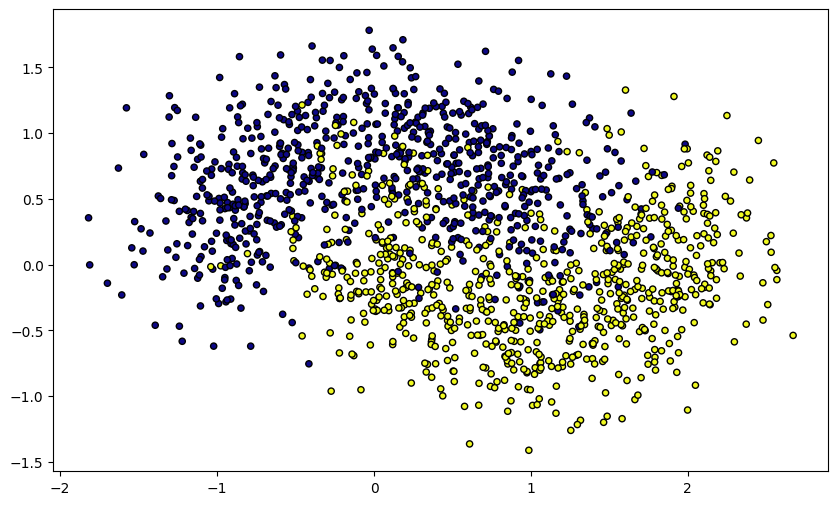

In [15]:
plt.figure(figsize=(10,6))
plt.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='plasma',s=20
,edgecolors='k')
plt.show()

# C. Decision boundaries (50 points)

<div dir="rtl" style="font-size:16px;">
<font face="B Yekan">

حال دیتاست خود را به ۳ بخش مساوی به صورت تصادفی تقسیم کنید. برای هر بخش ۳
[مدل طبقه بند نزدیک‌ترین همسایه (‌k-nearest neighbor)](https://fa.wikipedia.org/wiki/%D8%A7%D9%84%DA%AF%D9%88%D8%B1%DB%8C%D8%AA%D9%85_%DA%A9%DB%8C-%D9%86%D8%B2%D8%AF%DB%8C%DA%A9%E2%80%8C%D8%AA%D8%B1%DB%8C%D9%86_%D9%87%D9%85%D8%B3%D8%A7%DB%8C%D9%87)
 با پارامتر k={1, 25, 50} آموزش دهید (در مجموع ۹ ترکیب خواهید داشت)(برای به کارگیری مدل می توانید از کتابخانه استفاده کنید.). برای هر ترکیب،‌ مرز تصمیم‌گیری را به همراه تمام دیتاست رسم کنید و نتیجه را در یک نمودار سه در سه که ردیف‌های آن، دیتاست‌های 
 متفاوت و ستون‌های آن k های متفاوت اند،‌ نشان دهید.‌ (‌برای اینکار باید صفحه را مش‌بندی کنید و کلاس هر نقطه در مش را با طبقه بند خود پیش‌بینی کنید).
</div>

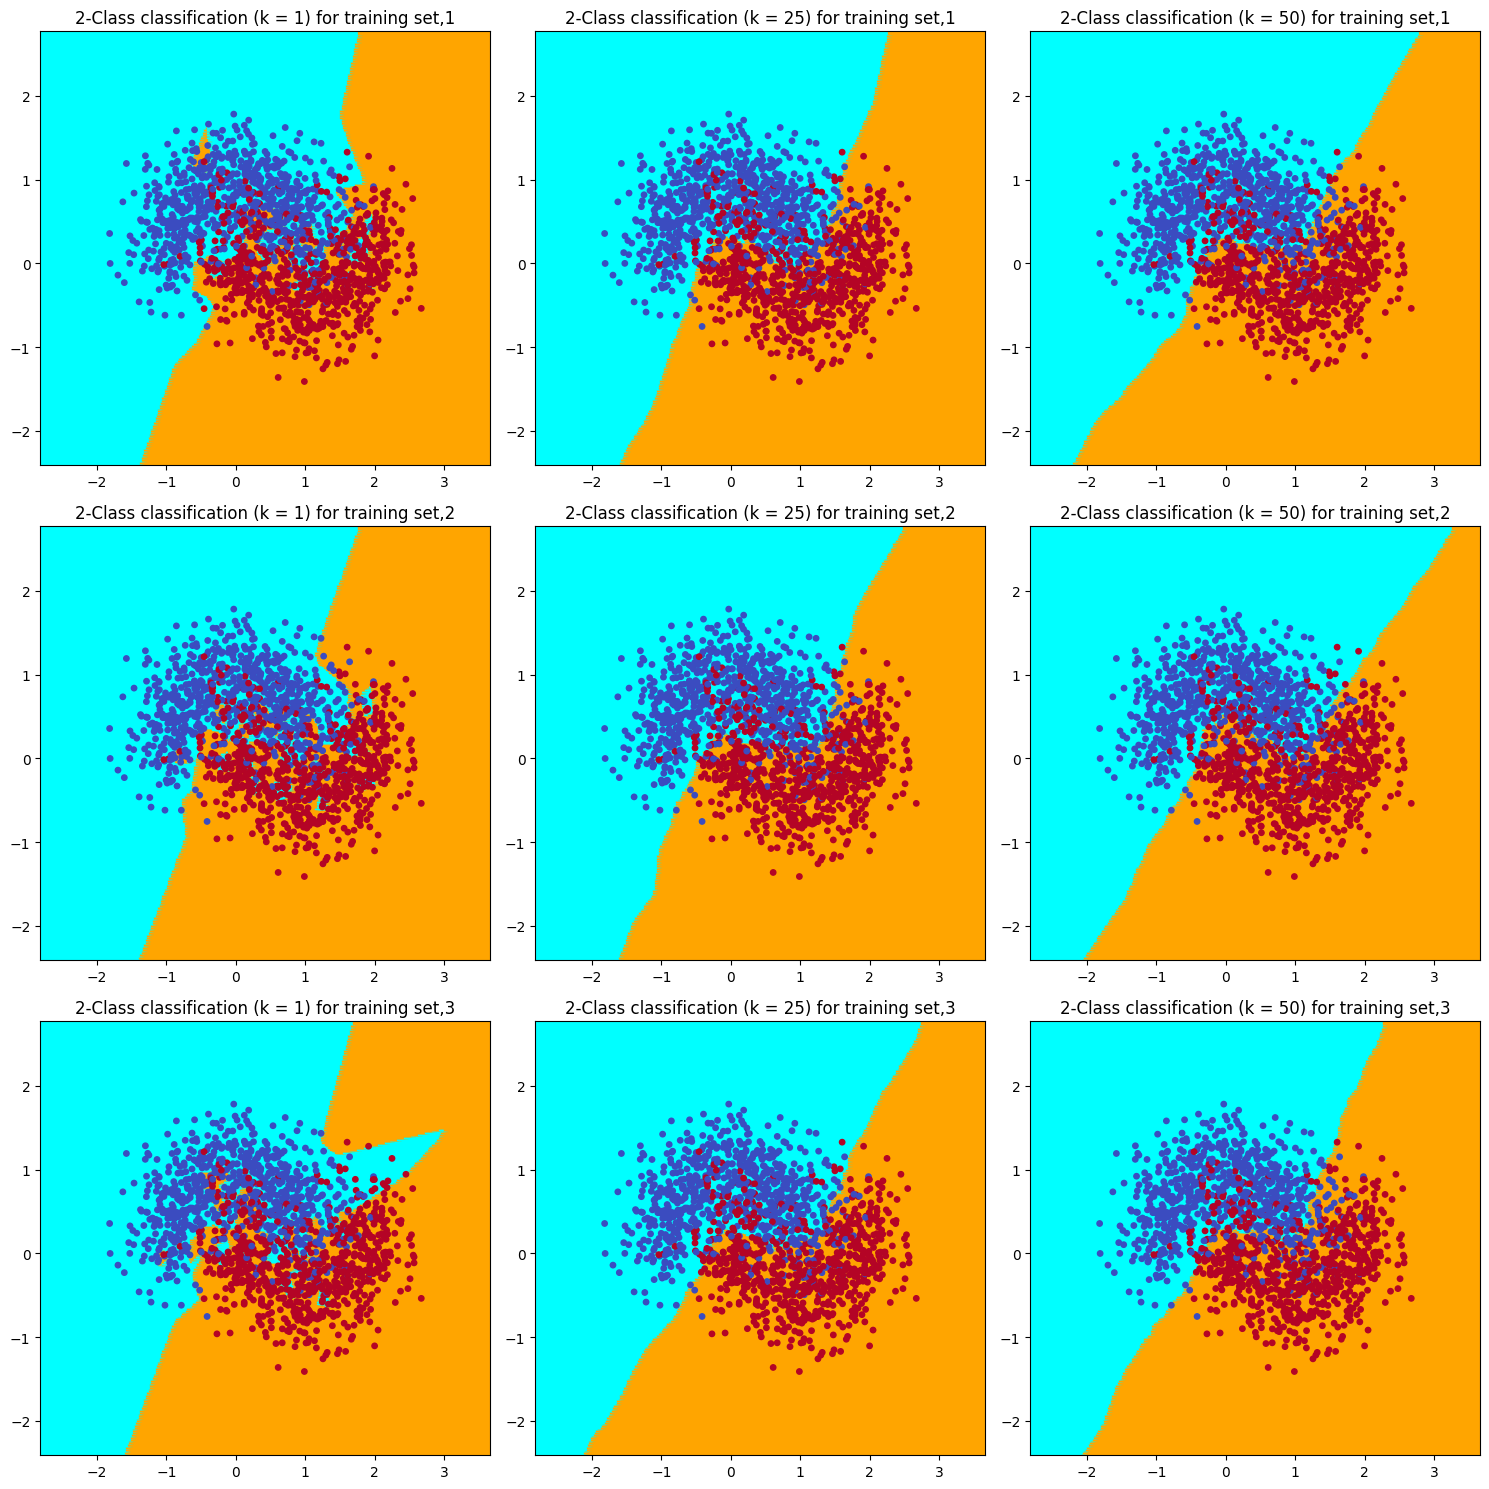

In [16]:
K = [1,25,50]
X = data[0]
y = data[1]
h=0.02
pad=1
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
for i in range(3):
    for k in range(3):
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.15)
        model = KNeighborsClassifier(n_neighbors=K[k])
        model.fit(X_train, y_train)
        x_min, x_max = X[:, 0].min()-pad, X[:, 0].max()+pad
        y_min, y_max = X[:, 1].min()-pad, X[:, 1].max()+pad
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min,y_max, h))
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        # axes[i][k].pcolormesh(xx, yy, Z, cmap=cmap_light,shading='auto')
        axes[i][k].scatter(xx.ravel(), yy.ravel(),c=Z,s=15,cmap=cmap_light,marker=',')
        # Plot also the training points
        axes[i][k].scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=15)
        axes[i][k].set_xlim(xx.min(), xx.max())
        axes[i][k].set_ylim(yy.min(), yy.max())
        axes[i][k].set_title("2-Class classification (k = %i) for training set,%i"% (K[k],i+1))
plt.tight_layout()

# D. Bias Variance Trade-off (20 points)

<div dir="rtl" style="font-size:16px;">
<font face="B Yekan">
 تفاوت مرز تصمیم‌گیری در ردیف‌ها و ستون‌ها را بیان کنید و مصالحه بین بایاس-واریانس را بر اساس نمودار توضیح دهید.
</div>

In [17]:
test_data = make_moons(n_samples=500, noise=0.35)
X_train, X_test, y_train, y_test = data[0], test_data[0], data[1], test_data[1]

In [18]:
train_error_rate = []
test_error_rate = []
for i in range(1,500):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_train = knn.predict(X_train)
    pred_test = knn.predict(X_test)
    train_error_rate.append(np.mean(pred_train != y_train))
    test_error_rate.append(np.mean(pred_test != y_test))

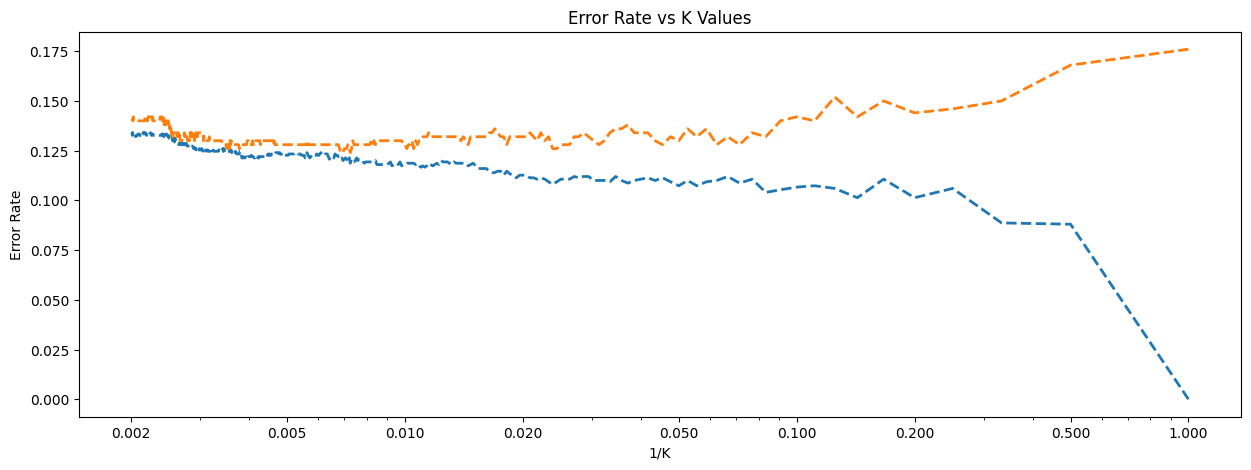

In [19]:
fig,ax = plt.subplots(figsize=(15,5))
x=np.linspace(1,499,499)
ax.plot(1/x, train_error_rate, linestyle='dashed', linewidth=2, label='train_error')
ax.plot(1/x, test_error_rate, linestyle='dashed', linewidth=2, label='test_error')
# plt.xticks([0.01,0.02,0.05,0.1,0.2,0.5,1])
ax.set_xscale('log')
ax.set_xticks([0.002, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1])
ax.get_xaxis().set_major_formatter(ScalarFormatter())
ax.set_title('Error Rate vs K Values')
ax.set_xlabel('1/K')
ax.set_ylabel('Error Rate')
plt.show()

In [20]:
cv_scores = []
neighbors = list(range(1,501))
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

The optimal number of neighbors is 24


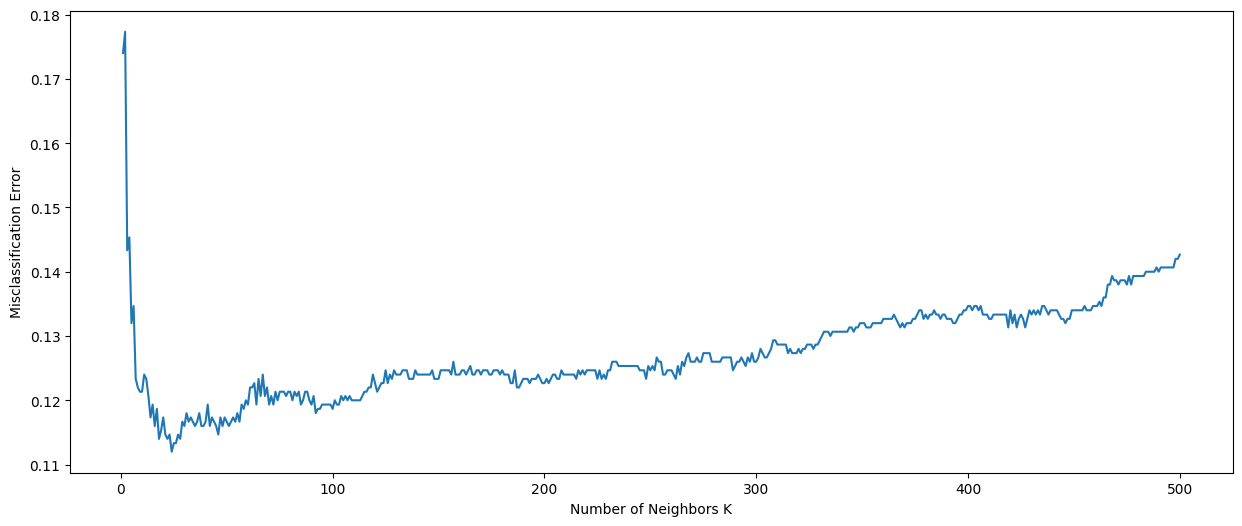

In [21]:
mse = [1 - x for x in cv_scores]
optimal_k = neighbors[mse.index(min(mse))]
print("The optimal number of neighbors is {}".format(optimal_k))
plt.figure(figsize=(15,6))
plt.plot(neighbors, mse)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Misclassification Error")
plt.show()